In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import clear_output
from sdzoo.sdzoo_v0 import SDGraph, parallel_env
from sdzoo.env.communication_model import CommunicationModel
import numpy as np
import networkx as nx
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt 
import pandas as pd

MAX_CYCLES = 200
MAX_EPISODES = 1
RENDER_ALL = False
RENDER_TERMINAL = True

sdg = SDGraph("../sdzoo/env/9nodes.graph")
env = parallel_env(sdg, 4,
                    speed = 40, 
                    observe_method="pyg", 
                    alpha=1.0,
                    beta=10.0,
                    load_reward=1.0,
                    drop_reward=1.0,
                    state_reward=1.0,
                    step_penalty=0.05,
                    step_reward=1.0)

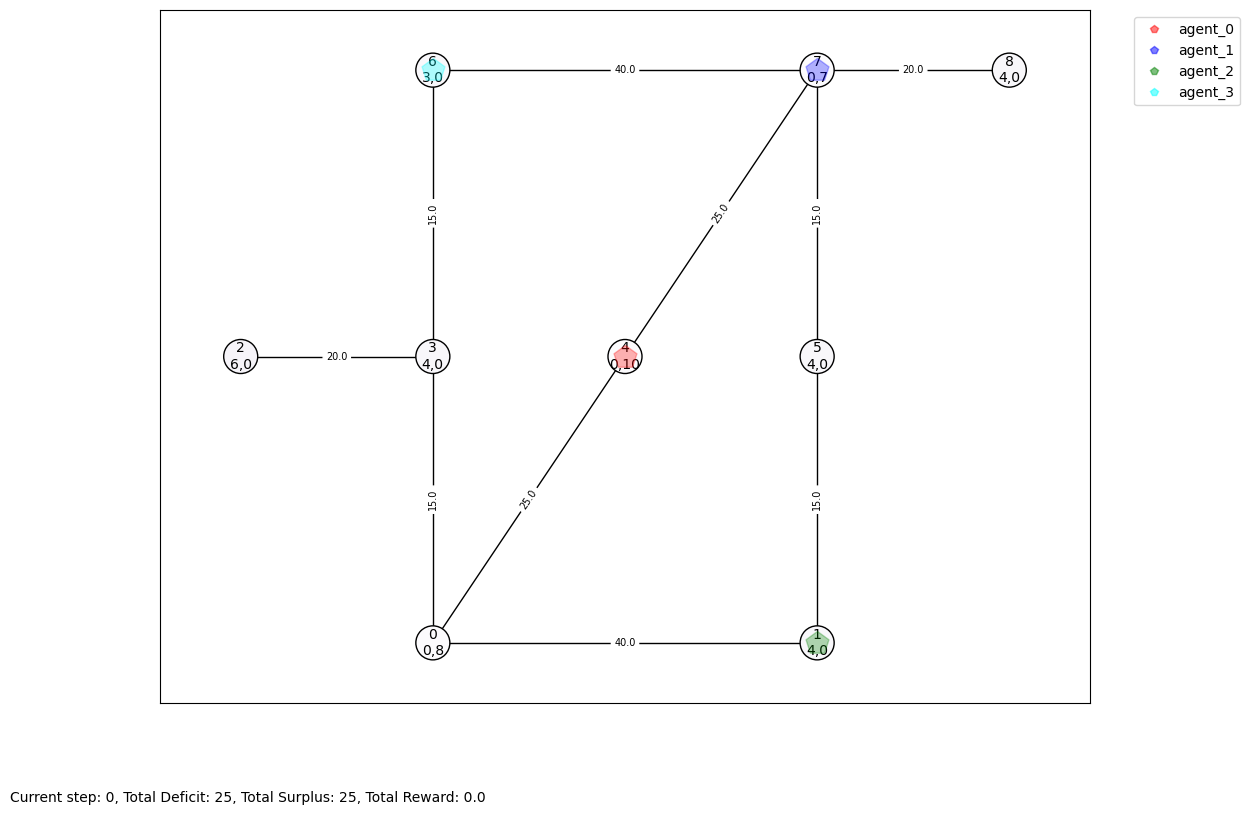

In [2]:
env.render()

## Random

In [3]:
from algos.random import RandomChoice

algo1 = RandomChoice(env)

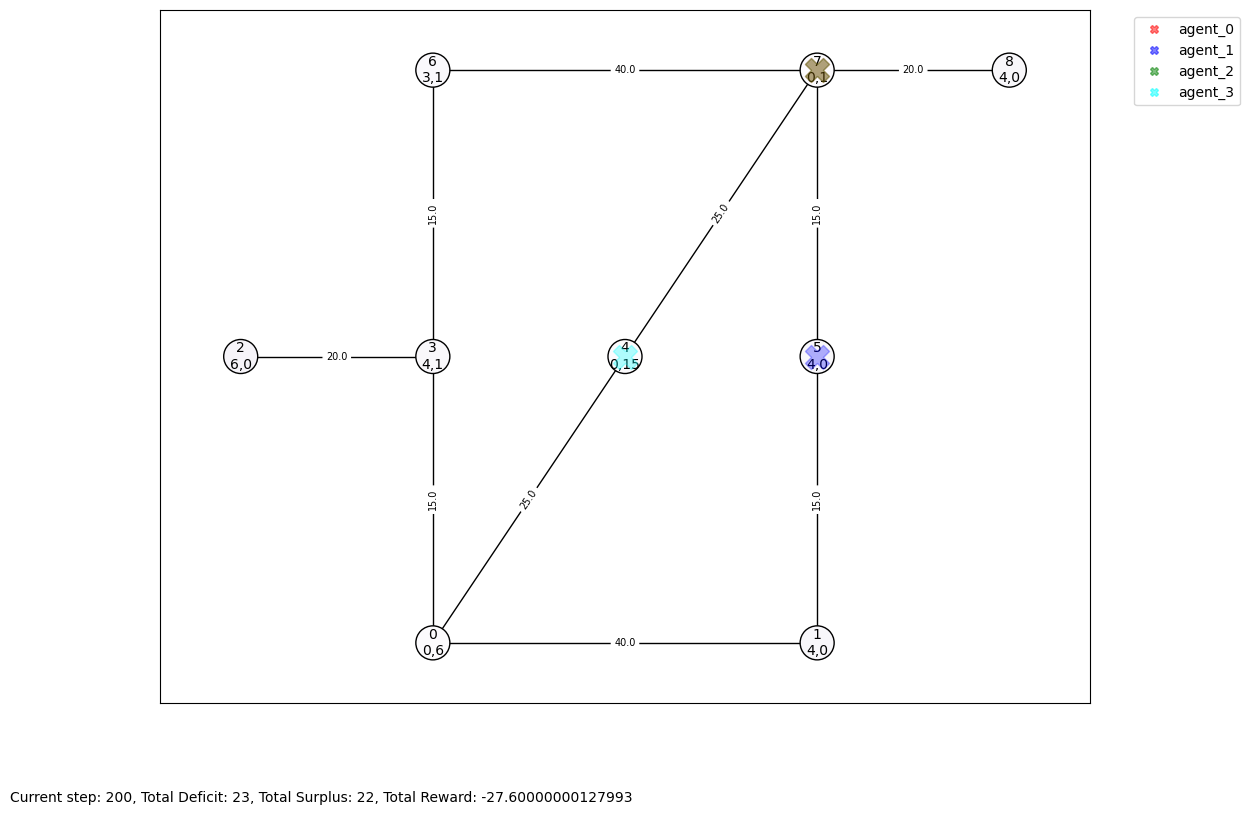

Random Episode: 0


,steps,reward1
0,200.0,0.5


In [4]:
rewards1 = algo1.evaluate(1, render=RENDER_ALL, render_terminal=RENDER_TERMINAL, max_cycles=MAX_CYCLES, max_episodes=MAX_EPISODES)
rewards1


## Improved Random

In [5]:
from algos.improved_random import ImprovedRandom

algo2 = ImprovedRandom(env)

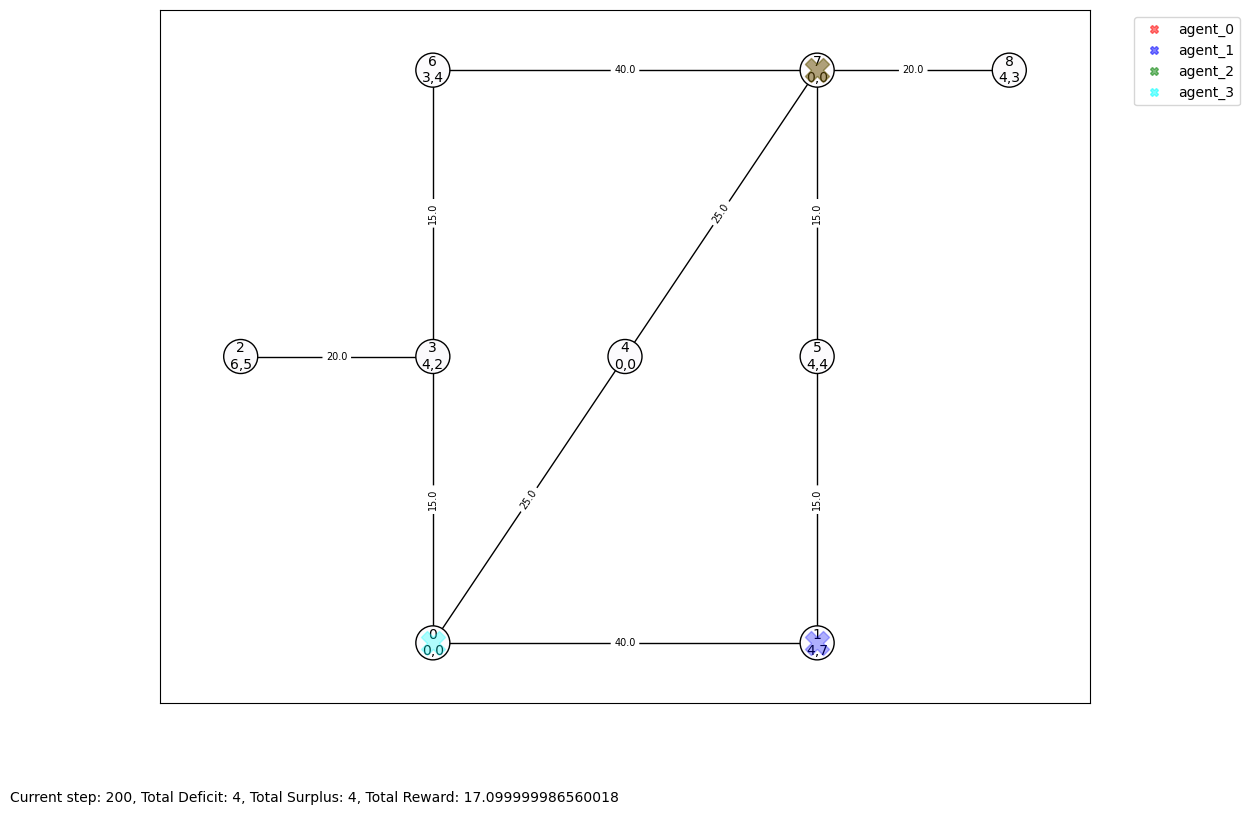

Improved Random Episode: 0


,steps,reward2
0,200.0,13.25


In [6]:
rewards2 = algo2.evaluate(2, render=RENDER_ALL, render_terminal=RENDER_TERMINAL, max_cycles=MAX_CYCLES, max_episodes=MAX_EPISODES)
rewards2

## Forced Load/Drop

In [7]:
from algos.force_load_drop import ForceLoadDrop

algo3 = ForceLoadDrop(env)

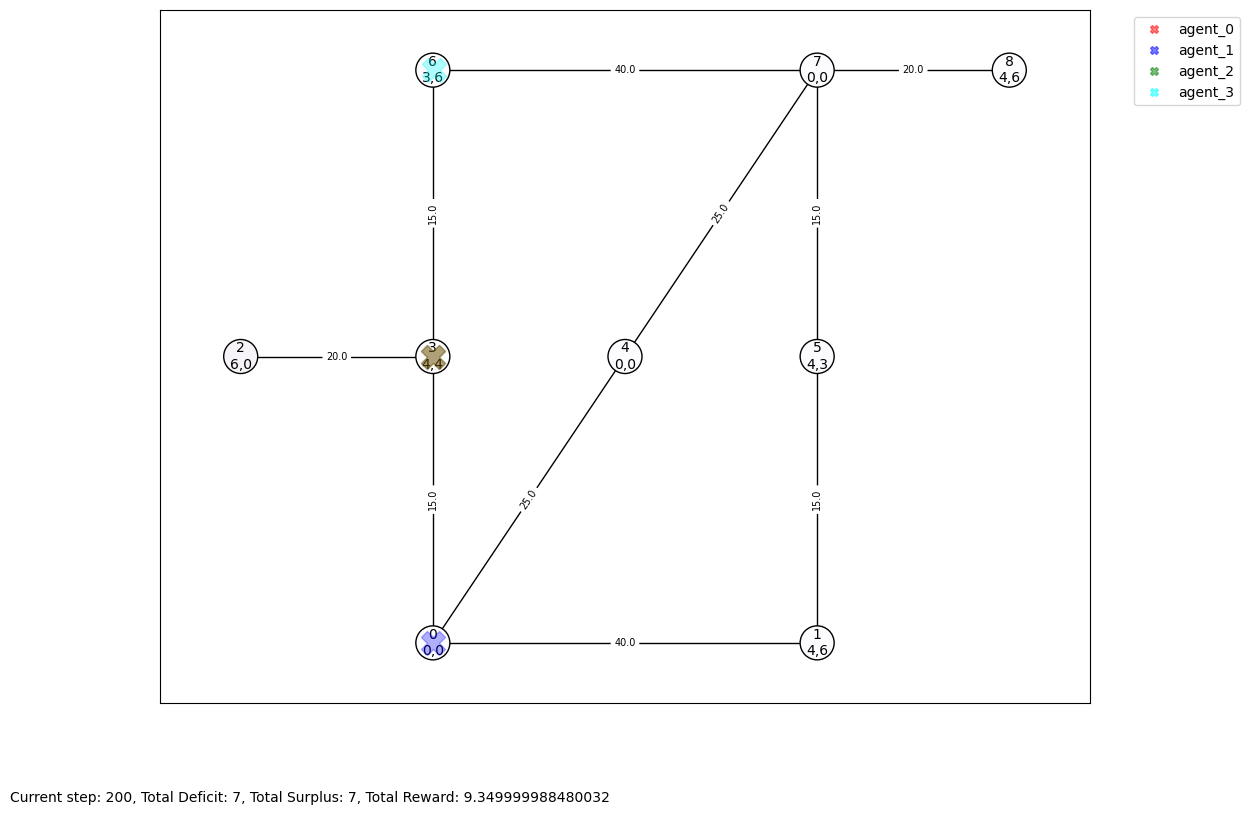

Force Load Drop Episode: 0


,steps,reward3
0,200.0,11.5


In [8]:
rewards3 = algo3.evaluate(3, render=RENDER_ALL, render_terminal=RENDER_TERMINAL, max_cycles=MAX_CYCLES, max_episodes=MAX_EPISODES)
rewards3

## Plotting

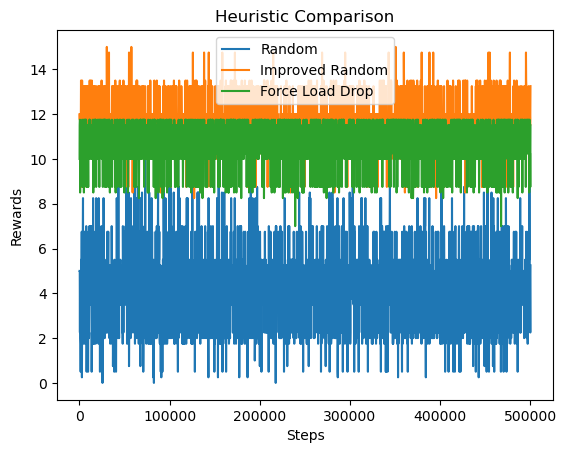

In [9]:
rewards = pd.read_csv('heuristic_rewards.csv')
rewards.rename(columns={'reward1': 'Random', 'reward2': 'Improved Random', 'reward3': 'Force Load Drop'}, inplace=True)
rewards.plot(x='steps', y=['Random', 'Improved Random', 'Force Load Drop'], title="Heuristic Comparison")

# Add labels and legend
plt.xlabel('Steps')
plt.ylabel('Rewards')
plt.legend()

# Show the plot
plt.show()

<Axes: title={'center': 'Search and Deliver Rewards'}, xlabel='Steps', ylabel='Rewards'>

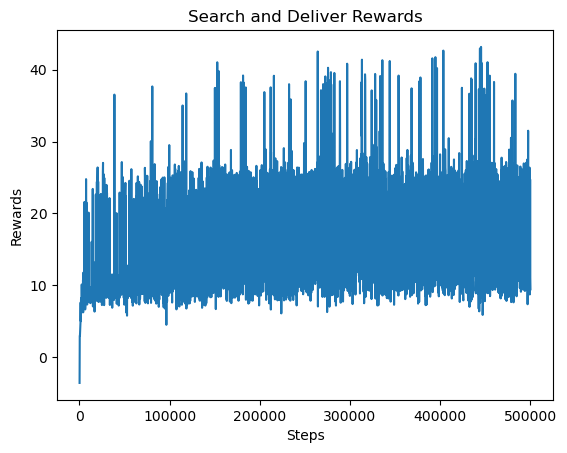

In [10]:
sd_rewards = pd.read_csv('sd_rewards.csv')
sd_rewards.rename(columns={'GOOD-rmappo-sd-beta-add-id-20240520-150835-seed1 - average_episode_rewards': 'Search and Deliver'}, inplace=True)
sd_rewards.plot(x='Step', y=['Search and Deliver'], title="Search and Deliver Rewards", legend=False, xlabel='Steps', ylabel='Rewards')

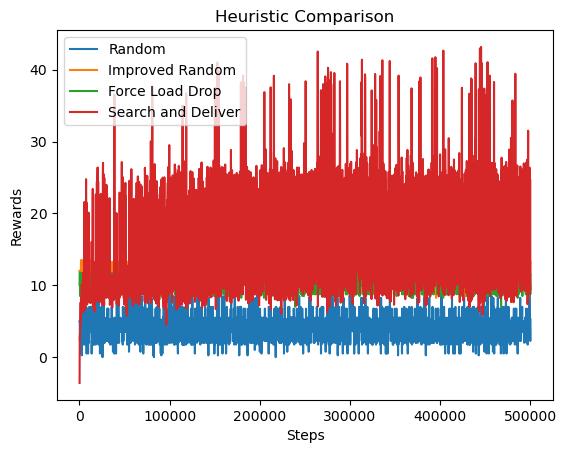

In [11]:
all_rewards = pd.concat([rewards, sd_rewards['Search and Deliver']], axis=1)
all_rewards.plot(x='steps', y=['Random', 'Improved Random', 'Force Load Drop', 'Search and Deliver'], title="Heuristic Comparison")

# Add labels and legend
plt.xlabel('Steps')
plt.ylabel('Rewards')
plt.legend()

# Show the plot
plt.show()

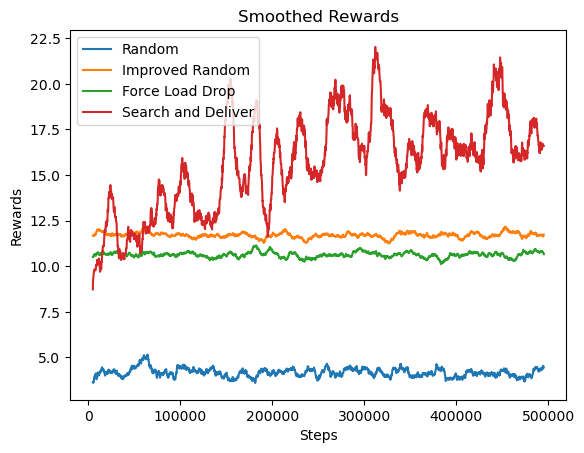

In [12]:
# Smooth the data using a rolling average with window size 50
smoothed_rewards = all_rewards.rolling(window=50).mean()

# Plot the smoothed rewards
smoothed_rewards.plot(x='steps', y=['Random', 'Improved Random', 'Force Load Drop', 'Search and Deliver'], title="Smoothed Rewards")

# Add labels and legend
plt.xlabel('Steps')
plt.ylabel('Rewards')
plt.legend()

# Show the plot
plt.show()